In [13]:
import SnowDepth as SD
import pandas as pd

# Path to TIFF files
data_dir = "data/tif_files"

# Load dataframe, filter out any rows with negative snow depth
df = SD.data_loader.build_dataframe(data_dir)

In [14]:
pd.set_option('display.float_format', '{:.3f}'.format)

# Check first few rows
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
  aoi_name  row  col   VH_dB   VV_dB  CrossPolRatio_dB  Elevation  Slope  \
0    CO_CP    0    0 -19.521 -10.817            -8.704   3638.032 44.199   
1    CO_CP    0    1 -20.707 -13.728            -6.979   3636.805 40.602   
2    CO_CP    0    2 -20.849 -14.081            -6.768   3636.938 37.172   
3    CO_CP    0    3 -20.019 -14.386            -5.633   3638.288 36.949   
4    CO_CP    0    4 -15.782 -11.978            -3.804   3640.314 37.412   

   sin_Aspect  cos_Aspect  SD  
0       0.195       0.981 NaN  
1       0.118       0.993 NaN  
2      -0.075       0.997 NaN  
3      -0.227       0.974 NaN  
4      -0.247       0.969 NaN  


In [15]:
# Check descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              row         col       VH_dB       VV_dB  CrossPolRatio_dB  \
count 5178574.000 5178574.000 5178574.000 5178574.000       5178574.000   
mean      634.295     570.533     -16.635      -9.968            -6.666   
std       427.871     394.848       4.047       4.808             2.670   
min         0.000       0.000     -40.992     -29.538           -28.031   
25%       287.000     250.000     -19.125     -12.961            -8.155   
50%       575.000     504.000     -16.442     -10.417            -6.505   
75%       892.000     799.000     -14.011      -7.522            -4.964   
max      1654.000    1517.000       8.784      18.409             7.128   

        Elevation       Slope  sin_Aspect  cos_Aspect          SD  
count 5178574.000 5178574.000 5178574.000 5178574.000 3133287.000  
mean     2542.454      20.703       0.066       0.062       1.383  
std       473.216      11.167       0.730       0.678       0.603  
min      1542.292       0.0

As we can see, there some SD values that are negative, and the max SD indicates some outliers

In [16]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isna().sum())


Missing Values per Column:
aoi_name                  0
row                       0
col                       0
VH_dB                     0
VV_dB                     0
CrossPolRatio_dB          0
Elevation                 0
Slope                     0
sin_Aspect                0
cos_Aspect                0
SD                  2045287
dtype: int64


In [17]:
# Number of NaN SD values 
nan_rows = df['SD'].isna().sum()
print(f"NaN SD values: {nan_rows}")

# Check how many SD values are below 0
negative_rows = len(df[(df['SD'] < 0)])
print(f"Negative SD values: {negative_rows}")

# We also check for outlier SD values above 3m
outlier_rows = len(df[(df['SD'] > 3)])
print(f"SD values above 3 m: {outlier_rows}")

NaN SD values: 2045287
Negative SD values: 14933
SD values above 3 m: 30988


In [7]:
# Remove negative and Nan SD rows
clean_df = df[(df['SD'] >= 0) & (df['SD'] <= 3)]

# Print number of rows removed
print(f"NaN, negative and outlier SD rows removed: {nan_rows + negative_rows + outlier_rows}")
print(f"Rows remaining: {len(clean_df)}")

NaN, negative and outlier SD rows removed: 2091208
Rows remaining: 3087366


In [8]:
print(clean_df.describe())

              row         col       VH_dB       VV_dB  CrossPolRatio_dB  \
count 3087366.000 3087366.000 3087366.000 3087366.000       3087366.000   
mean      638.095     560.781     -16.520      -9.887            -6.633   
std       372.035     317.630       3.869       4.680             2.636   
min         0.000       0.000     -36.508     -28.792           -28.031   
25%       352.000     313.000     -18.888     -12.771            -8.098   
50%       579.000     521.000     -16.361     -10.362            -6.474   
75%       873.000     752.000     -14.011      -7.513            -4.957   
max      1654.000    1517.000       8.784      18.409             6.770   

        Elevation       Slope  sin_Aspect  cos_Aspect          SD  
count 3087366.000 3087366.000 3087366.000 3087366.000 3087366.000  
mean     2540.360      19.991       0.053       0.102       1.373  
std       454.449      10.684       0.740       0.662       0.516  
min      1578.952       0.000      -1.000      -1.00

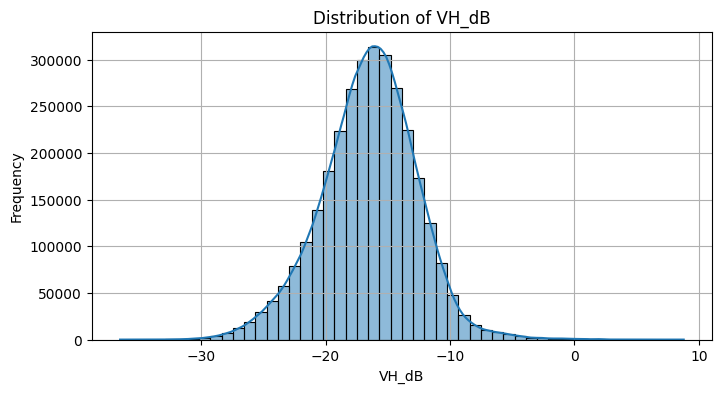

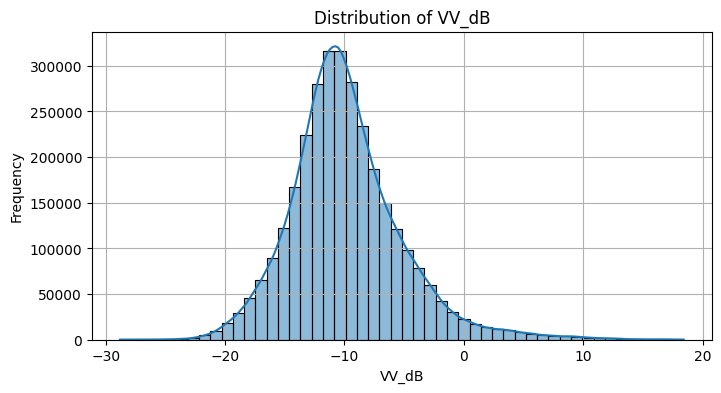

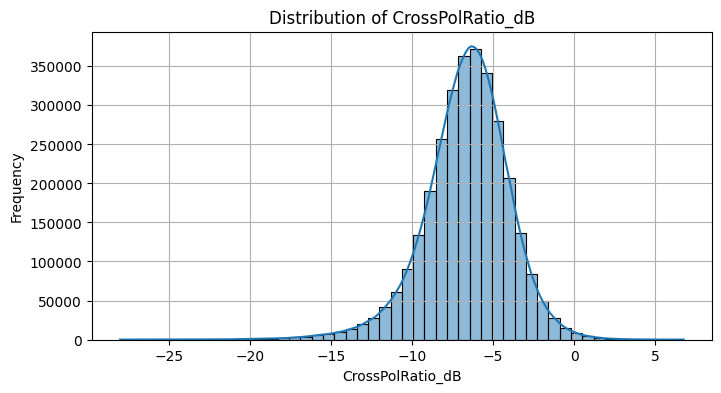

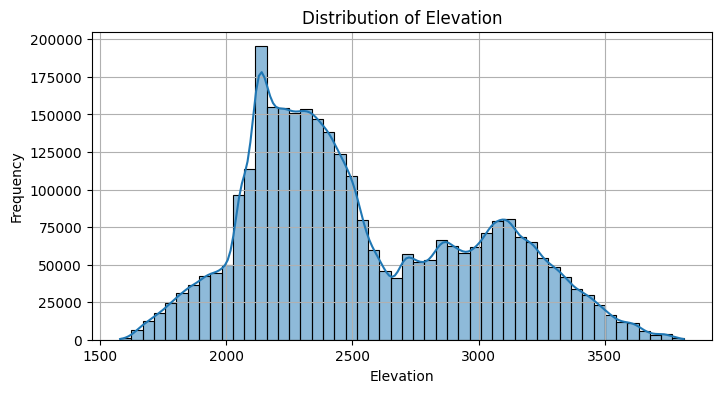

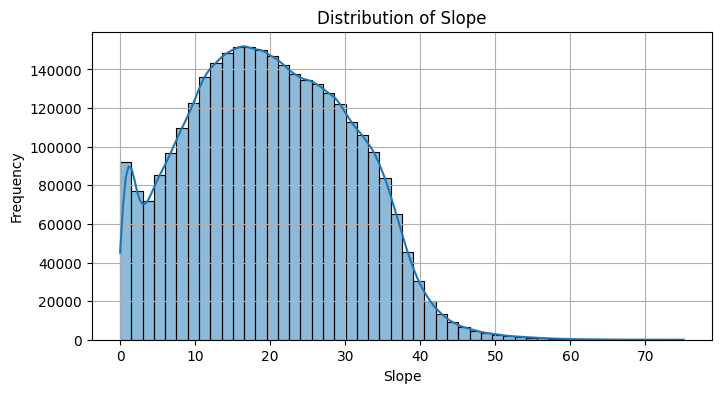

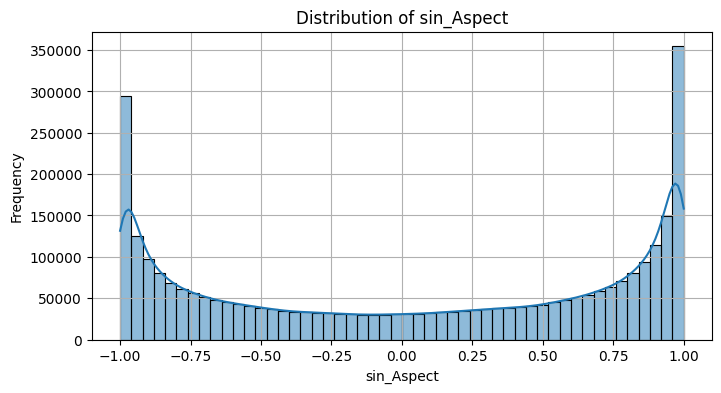

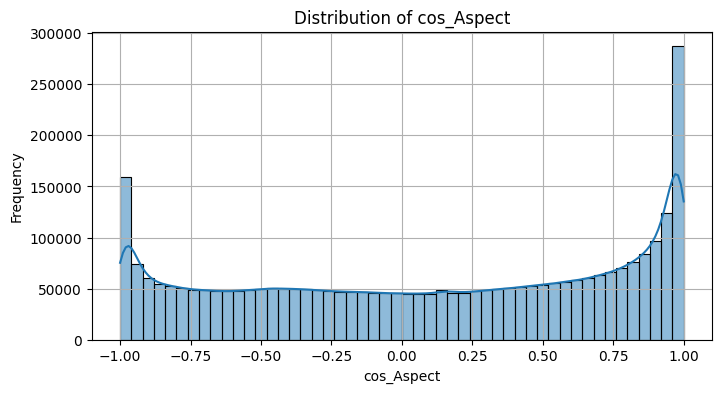

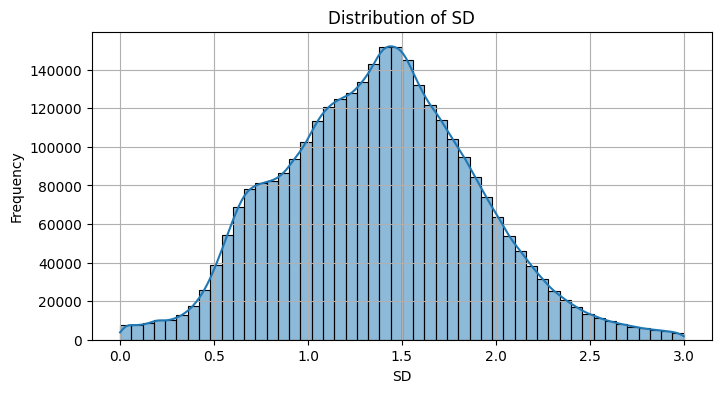

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

# Check variable distributions visually
variables = ['VH_dB', 'VV_dB', 'CrossPolRatio_dB', 'Elevation', 'Slope', 'sin_Aspect', 'cos_Aspect', 'SD']

# Plot histograms for numerical variables
for col in variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(clean_df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

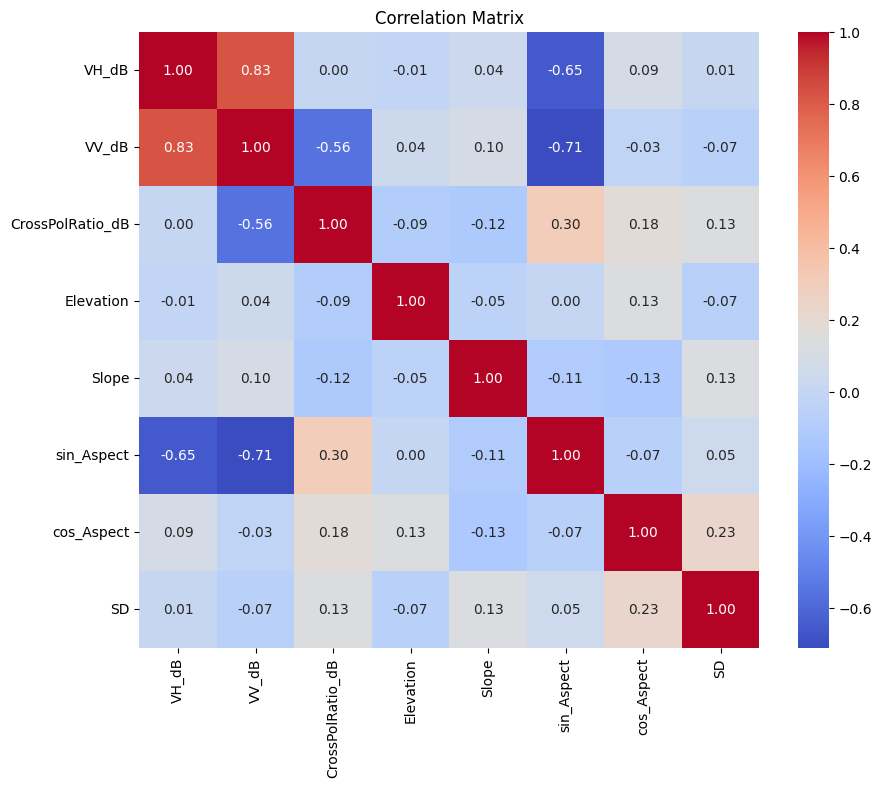

In [52]:
# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(clean_df[variables].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

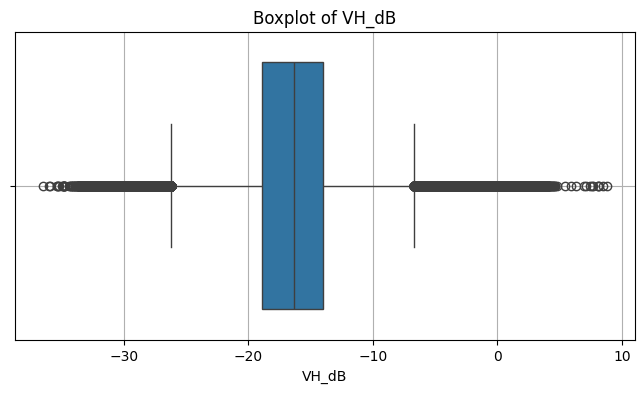

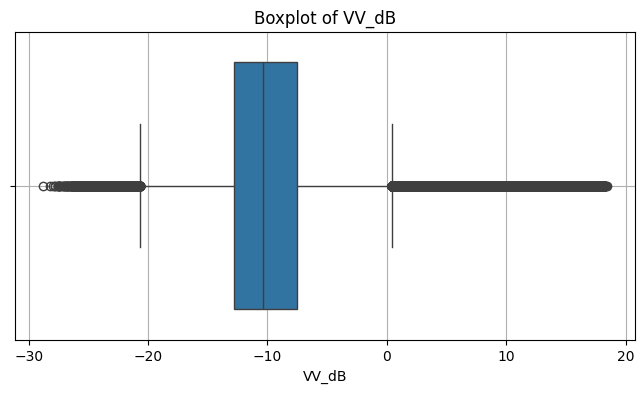

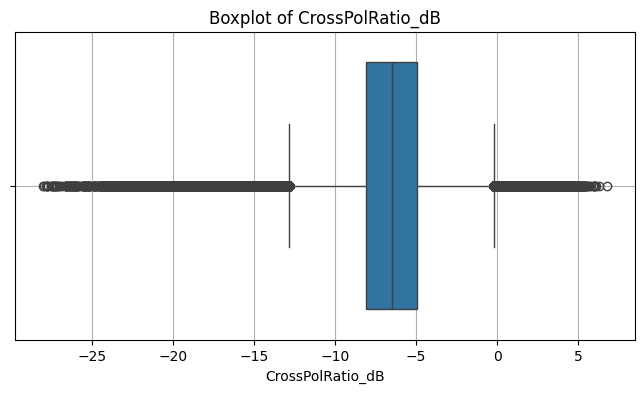

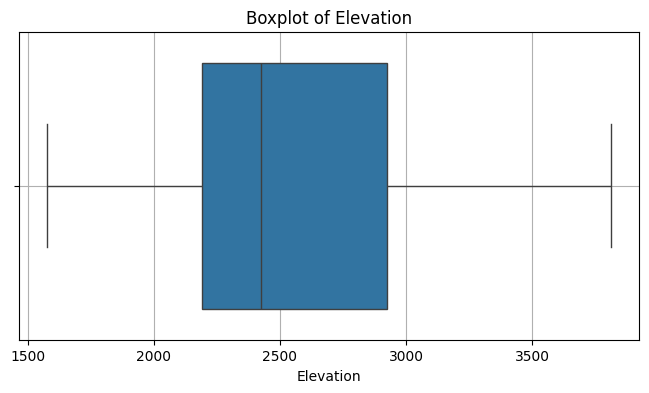

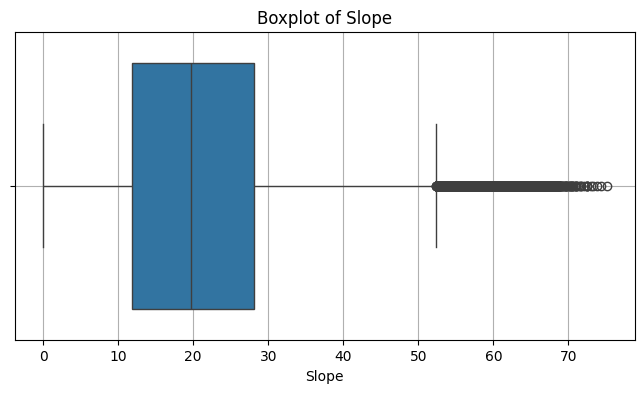

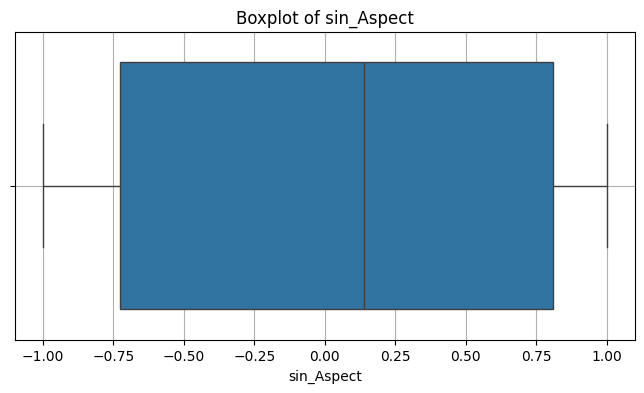

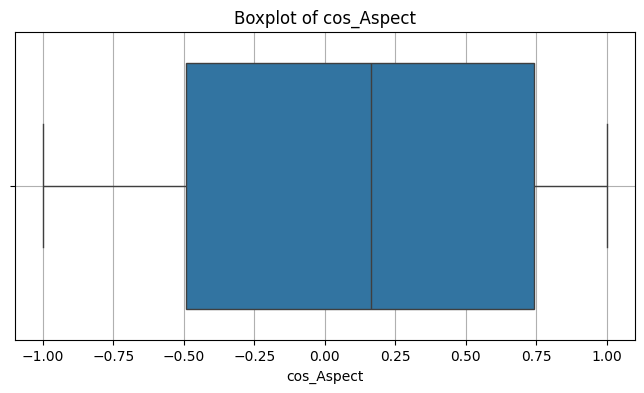

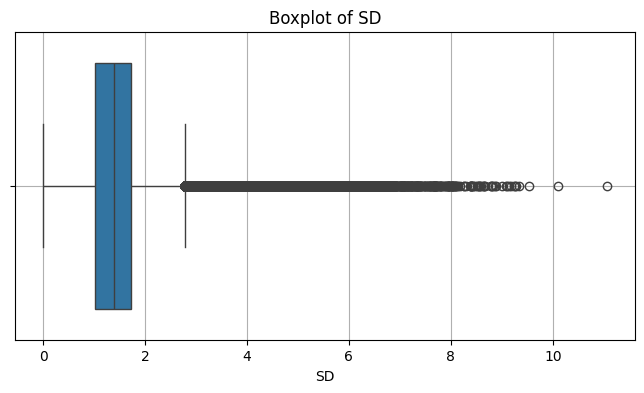

In [53]:
# Investigate specific aspects further, such as potential outliers 
for col in variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=clean_df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()